In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [93]:
ratings = pd.read_csv('gs://hdeshpa-final-storage/BX-Book-Ratings.csv', delimiter=";", encoding="latin1")
users = pd.read_csv('gs://hdeshpa-final-storage/BX-Users.csv', delimiter=";", encoding="latin1")
books = pd.read_csv('gs://hdeshpa-final-storage/BX-Books.csv', delimiter=";", encoding="latin-1", error_bad_lines=False)


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/opt/conda/miniconda3/lib/python3.8/site-packages/IPython/core/interactive

Grouping Data by User Id to find the number of reviews by each user

In [94]:
ratings['Total-rating'] = ratings.groupby(['User-ID'])['User-ID'].transform('count') 

Filtering To keep only those users who has given more than 50 reviews

In [95]:
ratings = ratings[ratings['Total-rating'] >50]

Dropping columns which is not required from the dataframe

In [96]:
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)

Merging ratings and books

In [97]:
rating_book = pd.merge(ratings, books, on='ISBN')

In [98]:
rating_book

,User-ID,ISBN,Book-Rating,Total-rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276847,0446364193,0,51,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
1,278418,0446364193,0,4533,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
2,5483,0446364193,0,56,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
3,7346,0446364193,0,1007,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
4,8362,0446364193,0,129,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
...,...,...,...,...,...,...,...,...
700843,276688,0449907422,0,91,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books
700844,276688,0517145553,0,91,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
700845,276688,0684838672,0,91,The LANGUAGE OF NAMES : WHAT WE CALL OURSELVES...,Justin Kaplan,1999,Touchstone
700846,276688,0788192043,0,91,The Hundred Secret Senses,Amy Tan,2000,DIANE Publishing Company


Grouping by Book Title to get the count of reviews for each book

In [99]:
rating_book['Nos-Book-ratings'] = rating_book.groupby('Book-Title')['Book-Rating'].transform('count')

In [100]:
rating_book

,User-ID,ISBN,Book-Rating,Total-rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Nos-Book-ratings
0,276847,0446364193,0,51,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
1,278418,0446364193,0,4533,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
2,5483,0446364193,0,56,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
3,7346,0446364193,0,1007,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
4,8362,0446364193,0,129,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
...,...,...,...,...,...,...,...,...,...
700843,276688,0449907422,0,91,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books,1
700844,276688,0517145553,0,91,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,29
700845,276688,0684838672,0,91,The LANGUAGE OF NAMES : WHAT WE CALL OURSELVES...,Justin Kaplan,1999,Touchstone,1
700846,276688,0788192043,0,91,The Hundred Secret Senses,Amy Tan,2000,DIANE Publishing Company,202


Dropping Duplicate records

In [101]:
rating_book.drop_duplicates(['Book-Title', 'User-ID'], inplace=True)

In [102]:
rating_book

,User-ID,ISBN,Book-Rating,Total-rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Nos-Book-ratings
0,276847,0446364193,0,51,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
1,278418,0446364193,0,4533,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
2,5483,0446364193,0,56,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
3,7346,0446364193,0,1007,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
4,8362,0446364193,0,129,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
...,...,...,...,...,...,...,...,...,...
700843,276688,0449907422,0,91,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books,1
700844,276688,0517145553,0,91,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,29
700845,276688,0684838672,0,91,The LANGUAGE OF NAMES : WHAT WE CALL OURSELVES...,Justin Kaplan,1999,Touchstone,1
700846,276688,0788192043,0,91,The Hundred Secret Senses,Amy Tan,2000,DIANE Publishing Company,202


Finding the book with hightest Reviews

In [103]:
top_10_most_reviewed = rating_book[['Book-Title', 'Nos-Book-ratings']].value_counts()[0:10].reset_index()

In [104]:
top_10_most_reviewed

,Book-Title,Nos-Book-ratings,0
0,Wild Animus,844,844
1,The Lovely Bones: A Novel,574,574
2,The Da Vinci Code,445,444
3,Bridget Jones's Diary,443,400
4,The Nanny Diaries: A Novel,400,393
5,Divine Secrets of the Ya-Ya Sisterhood: A Novel,383,380
6,The Secret Life of Bees,384,372
7,A Painted House,387,368
8,Life of Pi,357,351
9,The Firm,361,349


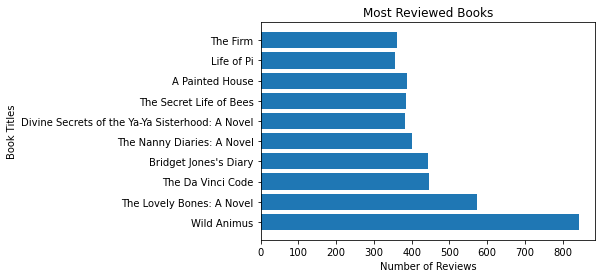

In [105]:

plt.barh(top_10_most_reviewed['Book-Title'], top_10_most_reviewed['Nos-Book-ratings'])
 
# setting label of y-axis
plt.ylabel("Book Titles")
 
# setting label of x-axis
plt.xlabel("Number of Reviews")
plt.title("Most Reviewed Books")
plt.show()

Getting Books which have highest ratings ever recieved

In [106]:
top_10_fav_books = rating_book[['Book-Title', 'Book-Rating']].value_counts()[:-10].reset_index()

In [107]:
top_10_fav_books = top_10_fav_books.head(10)

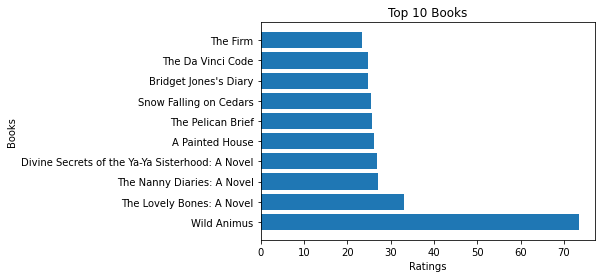

In [108]:
plt.barh(top_10_fav_books['Book-Title'], top_10_fav_books[0]/10)
 
# setting label of y-axis
plt.ylabel("Books")
 
# setting label of x-axis
plt.xlabel("Ratings")
plt.title("Top 10 Books")
plt.show()

Years with Highest Book Published

In [109]:
data_count_each_year = rating_book.groupby('Year-Of-Publication')['Book-Title'].nunique().reset_index()


In [110]:
data_count_each_year  = data_count_each_year.drop([data_count_each_year.index[0],data_count_each_year.index[183],data_count_each_year.index[184], data_count_each_year.index[185]])

In [111]:
data_count_each_year = data_count_each_year[data_count_each_year['Book-Title']>2000]

In [112]:
data_count_each_year = data_count_each_year.tail(10).reset_index()

In [113]:
data_count_each_year

,index,Year-Of-Publication,Book-Title
0,167,1993,2125
1,168,1994,2345
2,169,1995,2588
3,170,1996,2531
4,171,1997,2571
5,172,1998,2669
6,173,1999,2859
7,174,2000,2634
8,175,2001,2390
9,176,2002,2408


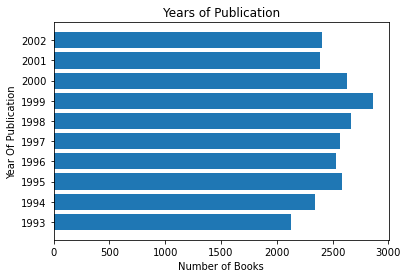

In [114]:

plt.barh(data_count_each_year['Year-Of-Publication'], data_count_each_year['Book-Title'])
 
# setting label of y-axis
plt.ylabel("Year Of Publication")
 
# setting label of x-axis
plt.xlabel("Number of Books")
plt.title("Years of Publication")
plt.show()



Top Publishers

In [115]:
top_publishers = rating_book[['Publisher']].value_counts()[0:10].reset_index()


In [116]:
top_publishers

,Publisher,0
0,Pocket,22617
1,Ballantine Books,22483
2,Harlequin,22119
3,Berkley Publishing Group,19292
4,Bantam Books,16793
5,Warner Books,16716
6,Bantam,13406
7,Signet Book,13286
8,Avon,13267
9,Silhouette,12492


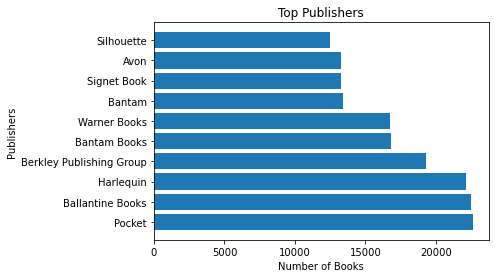

In [117]:

plt.barh(top_publishers['Publisher'], top_publishers[0])
 
# setting label of y-axis
plt.ylabel("Publishers")
 
# setting label of x-axis
plt.xlabel("Number of Books")
plt.title("Top Publishers")
plt.show()



Top 10 Authors

In [118]:
top_authors = rating_book[['Book-Author']].value_counts()[0:10].reset_index()


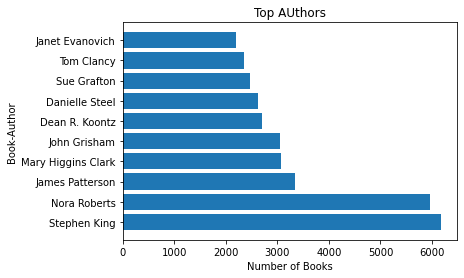

In [119]:

plt.barh(top_authors['Book-Author'], top_authors[0])
 
# setting label of y-axis
plt.ylabel("Book-Author")
 
# setting label of x-axis
plt.xlabel("Number of Books")
plt.title("Top AUthors")
plt.show()

WordCLoud of Book Titiles

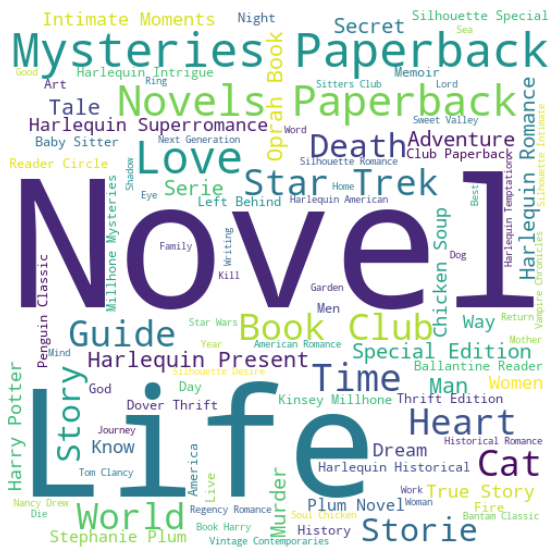

In [122]:
from wordcloud import WordCloud,STOPWORDS
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
                width=500, height=500)
wc.generate(' '.join(rating_book['Book-Title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()